# **Análise Exploratória**

In [1]:
#importando...
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#upload
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
#Criando o Df
df = pd.read_excel("AdventureWorks.xlsx")

In [4]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#quanridade de linhas e colunas
df.shape

(904, 16)

In [6]:
#Tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
#Receita Total
df["Valor Venda"].sum()

5984606.1426

In [8]:
#Criando Custo
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [9]:
#Custo Total
round(df['Custo'].sum(),2)

2486783.05

In [11]:
#Coluna Lucro
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [15]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [16]:
#Lucro Total
round(df['Lucro'].sum(),2)

3497823.09

In [20]:
#Coluna Tempo para enviar produto
df['Tempo Entrega'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [21]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Entrega
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7


In [25]:
#Média de tempo por data
df.groupby("Marca")['Tempo Entrega'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Entrega, dtype: float64

## Lucro Por Ano e Data

In [29]:
pd.options.display.float_format = '{:20.2f}'.format

In [30]:
#Agrupando ano e data
df.groupby([df['Data Venda'].dt.year,'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works              306641.16
            Contoso                       56416.00
            Fabrikam                    1557020.55
2009        Adventure Works              405395.08
            Contoso                      138258.95
            Fabrikam                    1034091.35
Name: Lucro, dtype: float64

In [34]:
#Reset no index
lucro_ano = df.groupby([df['Data Venda'].dt.year,'Marca'])['Lucro'].sum().reset_index
lucro_ano

<bound method Series.reset_index of Data Venda  Marca          
2008        Adventure Works              306641.16
            Contoso                       56416.00
            Fabrikam                    1557020.55
2009        Adventure Works              405395.08
            Contoso                      138258.95
            Fabrikam                    1034091.35
Name: Lucro, dtype: float64>

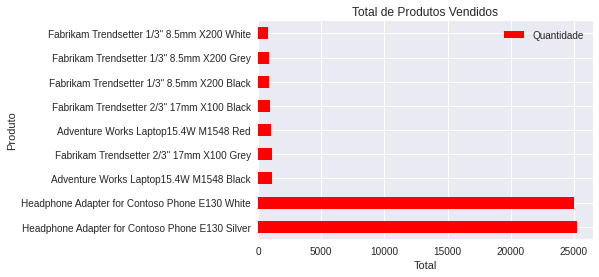

In [46]:
#Gráfico Total de Produtos Vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).plot.barh(title="Total de Produtos Vendidos", color='red')
plt.xlabel("Total")
plt.ylabel("Produto")
plt.legend();

<function matplotlib.pyplot.legend>

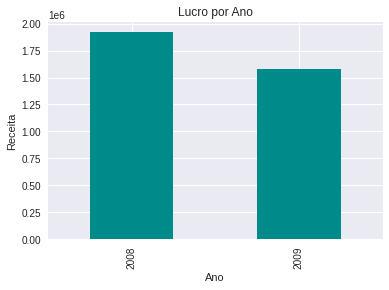

In [43]:
#Gráfico Lucro x Ano
df.groupby(df['Data Venda'].dt.year)["Lucro"].sum().plot.bar(title="Lucro por Ano", color='darkcyan')
plt.xlabel("Ano")
plt.ylabel("Receita")
plt.legend

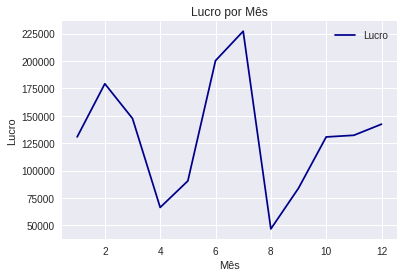

In [48]:
#Lucro por mês 2008
df_2008 = df[df["Data Venda"].dt.year ==2009]

df_2008.groupby(df_2008['Data Venda'].dt.month)["Lucro"].sum().plot(title="Lucro por Mês",color="darkblue")
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.legend();

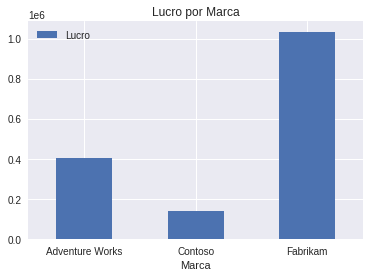

In [51]:
#Lucro por marca 2008
df_2008.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro por Marca")
plt.xlabel("Marca")
plt.xticks(rotation='horizontal')
plt.legend();

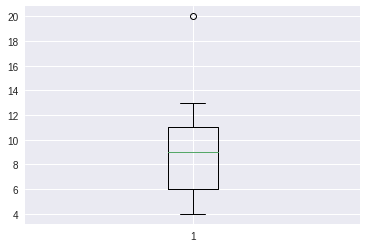

In [54]:
#Gráfico Boxplot
plt.boxplot(df['Tempo Entrega']);

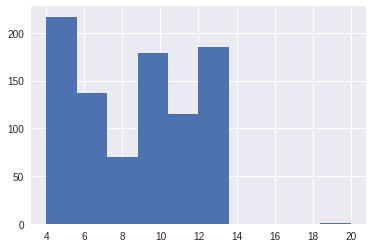

In [55]:
#Histograma
plt.hist(df['Tempo Entrega']);